# Image Intensity Transformation

*image preprocessing*, *histogram equalization*, *thresholding*

**Problem**

We want to transfrom the intensity of a given image by implement two methods.

**Method**

Histogram equalization is a method in image proceessing for contrast adjustment using the image histogram. It provides better quality of images without loss of any information. The idea is to transform the cdf of the intensity histogram into linear, uniform histogram. By doing so, the most frequent intensity values are streched out. Thus, areas of lower local contrast gains a higher contrast. 


The method consists of:

1. Compute probability density function (pdf) of the image using histogram.
2. Compute cumulative distribution function (cdf).
3. Find transform: T= \textit{floor}(255 * \textit{cdf})
4. Transform the image by replacing the gray levels of the original image with the new values you have found in step 3.

Another way is histogram streching. Contrast Stretching and Histogram Equalization have the same goal: making the images to use entire range of values available to them. During histogram equalization the overall shape of the histogram changes, whereas in histogram stretching the overall shape of histogram remains same.


In [1]:
import numpy as np
import pandas as pd
from math import floor
import scipy.ndimage as ndi
from PIL import Image, ImageOps
from sklearn.cluster import k_means
import math
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)

In [2]:
# kernels 
kernels = {
    'Gaussian': 1/16 * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]),
    'Laplacian': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    'Denoise': 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    'Sharpen': np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),
    'Sobel': np.array([[1, 2, 1],[ 0, 0, 0],[-1, -2, -1]] )/8,
    'Prewitt': np.array([[-1, 0, 1],[ -1, 0, 1],[-1, 0, 1]] )
}

In [6]:
# original image 
image = plt.imread('images/valley.jpg')

In [7]:
def enhanceImageContrast(image, method='equalizaion', lmb=None):
    
    # view image 
    plt.imshow(image, cmap='gray')
    plt.show()

    # compute histogram of image intensities  
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    fig.suptitle('Original image')
    bins = np.arange(0, 256, 1, dtype=int)
    b, bins, patches = ax[0].hist(image.ravel(), bins=bins, density=True)
    cdf = np.cumsum(np.concatenate((b, np.zeros((1,)))))
    ax[1].plot(bins, cdf)
    plt.show()
    
    # transformation 
    image_new = np.zeros(image.shape)
    
    if method == 'equalizaion':
        T = np.floor(255 * cdf)
        for x in range(image_new.shape[0]):
            for y in range(image_new.shape[1]):
                image_new[x,y] = T[image[x,y]]
    else:
        image_new = lmb * (image.astype(float) - np.min(image))/(np.max(image) - np.min(image)) 
        image_new = image_new.astype(int)
    
    plt.imshow(image_new, cmap='gray')
    plt.show()
    
    # view results 
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    fig.suptitle('New image')
    bins = np.arange(0, 256, 1, dtype=int)
    b, bins, patches = ax[0].hist(image_new.ravel(), bins=bins, density=True)
    cdf = np.cumsum(np.concatenate((b, np.zeros((1,)))))
    ax[1].plot(bins, cdf)
    plt.show()

### Method 1: Histogram equalization 

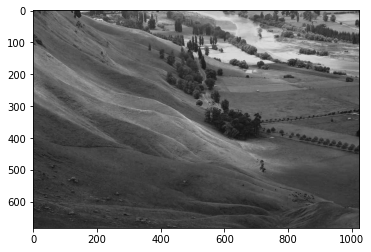

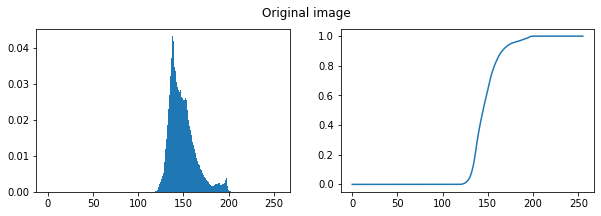

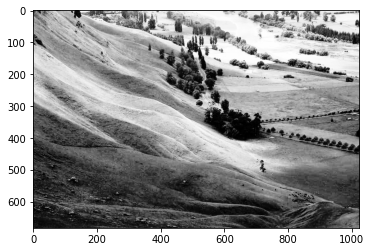

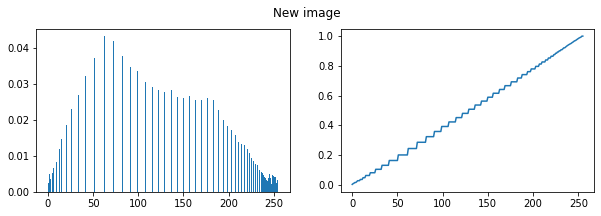

In [8]:
enhanceImageContrast(image, method='equalizaion')

### Method 2: Histogram streching

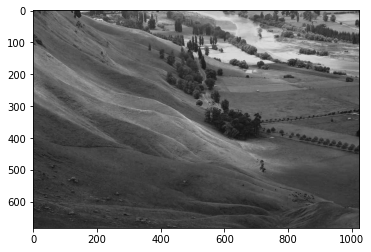

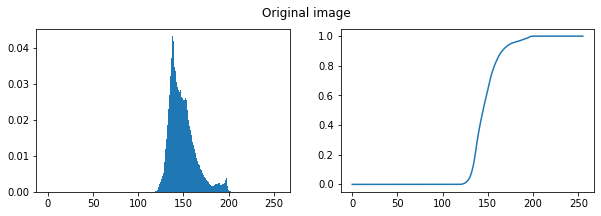

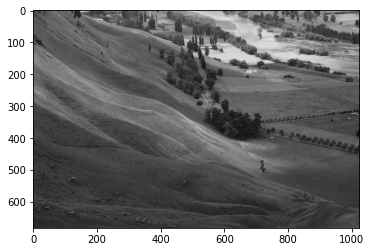

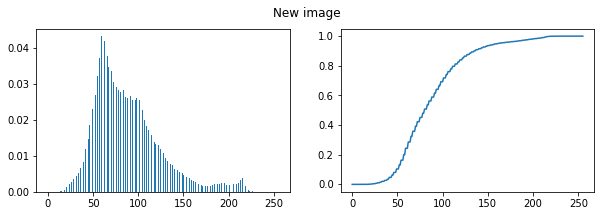

In [9]:
enhanceImageContrast(image, method='streching', lmb=255)

# Other transformations 

Given an image, we will apply the following transformations:
1. Linear transformation: obtains the negative image, i.e. bright regions become dark, and dark regions become bright. 
2. Log-transformation: expands the dark pixels in the image while compressing the brighter pixels
3. Thresholding: converts the image to black and white using a pre-defined threhsold for black or white 
4. Histogram shift: changes the brightness of the image
5. Histogram stretch: stretches the histogram of the image so that it has contrast equivalent to lambda


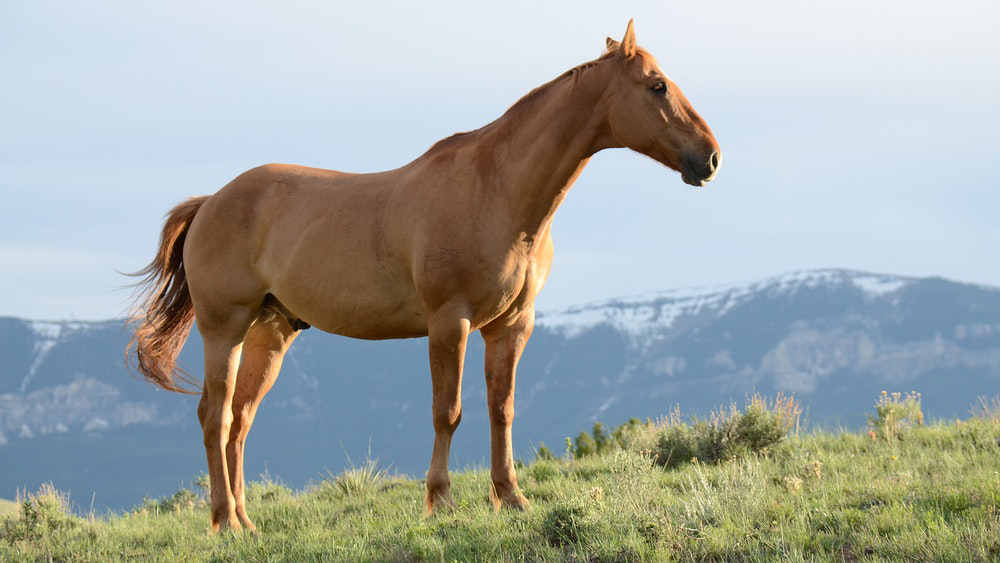

In [3]:
# read and show the image 
image = Image.open('images/horse1-2.jpg')    # Open image as PIL image object
image

Original size: (563, 1000, 3)
New size: (187, 333, 3)


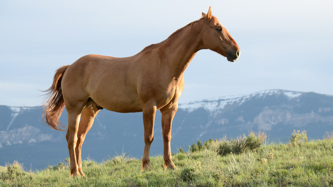

In [4]:
# resize
print("Original size:", np.asarray(image).shape)
image_resized = image.resize((np.array(image.size)/3).astype(int)) 
print("New size:", np.asarray(image_resized).shape)
image_resized

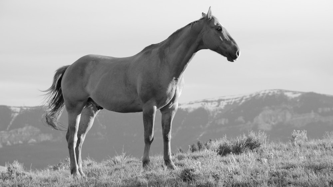

In [5]:
# convert to gray image
image_gray = image_resized.convert('L')
image_gray

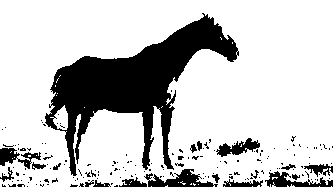

In [334]:
# convert to gray image
image_bw = image_gray.point(lambda x: 0 if x<128 else 255, '1')
image_bw

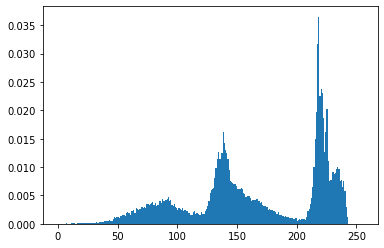

In [336]:
# histogram of the gray image 
bins = np.arange(0, 256, 1, dtype=int)
b, bins, patches = plt.hist(np.asarray(image_gray).ravel(), bins=bins, density=True)
plt.title("Histogram of the gray image")
plt.show()

The histogram of the gray image is tri-modal, so there seems to be three dominant colors. 

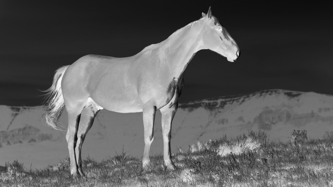

In [358]:
# linear transformation 
t = np.asarray(image_gray)
t = 255 - t
Image.fromarray(t.astype('uint8'))

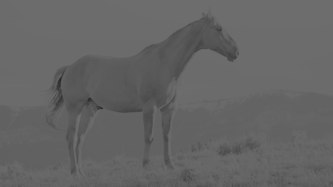

In [364]:
# log transformation 
c = 20
t = c * np.log(np.asarray(image_gray) + 1)
Image.fromarray(t.astype('uint8'))

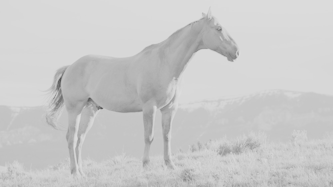

In [365]:
# log transformation 
c = 40
t = c * np.log(np.asarray(image_gray) + 1)
Image.fromarray(t.astype('uint8'))

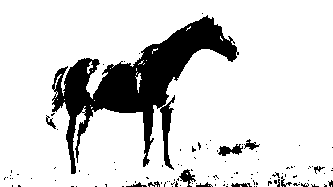

In [359]:
# thresholding 
thd = 100
t = image_gray.copy()
t.point(lambda x: 0 if x<thd else 255, '1')

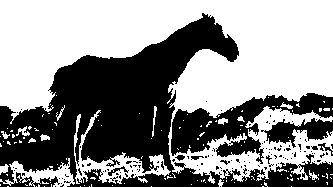

In [360]:
# thresholding 
thd = 150
t = image_gray.copy()
t.point(lambda x: 0 if x<thd else 255, '1')

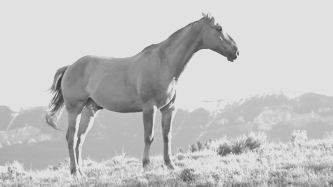

In [45]:
# histogram shift 
l, u, s = 25, 225, 50
t = np.asarray(image_gray).astype(float)
t = np.maximum(np.minimum(t + s, u), l)
#plt.imshow(t, cmap="gray")
Image.fromarray(t.astype('uint8'))
#plt.show()

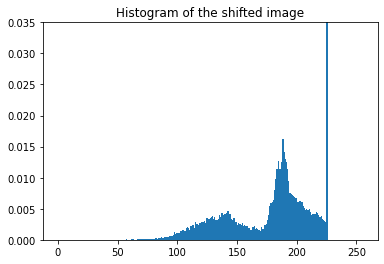

In [46]:
# shifted histogram
bins = np.arange(0, 256, 1, dtype=int)
#b, bins, patches = plt.hist(np.asarray(image_gray).ravel(), bins=bins, density=True)
b, bins, patches = plt.hist(t.ravel(), bins=bins, density=True)
plt.title("Histogram of the shifted image")
plt.ylim(0,0.035)
plt.show()

Contrast of original image: 241
Contrast of transformed image: 200


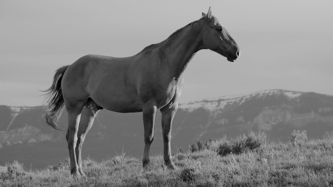

In [363]:
# histogram stretch 
lmb = 200
t = np.asarray(image_gray)
print("Contrast of original image:", np.max(t) - np.min(t))
t = lmb * (t.astype(float) - np.min(t))/(np.max(t) - np.min(t)) 
print("Contrast of transformed image:", int(np.max(t) - np.min(t)))
Image.fromarray(t.astype('uint8'))

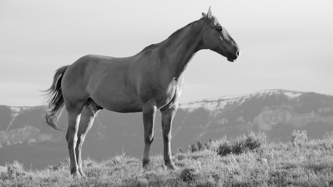

In [373]:
# create a noisy image
mean, var = 0, 100
t = np.asarray(image_gray) + np.random.normal(mean, math.sqrt(100))
Image.fromarray(t.astype('uint8'))

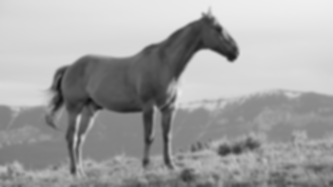

In [375]:
# denoise the image using convolution mask 
t = ndi.convolve(t, kernels[m'Denoise'])
Image.fromarray(t.astype('uint8'))

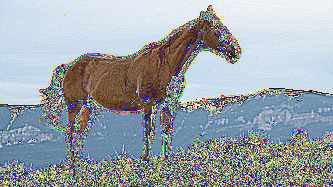

In [390]:
# sharpen the color image
t = np.asarray(image_resized)
ts = np.zeros(t.shape)
for i in range(3):
    ts[:,:,i] = ndi.convolve(t[:,:,i], kernels['Sharpen'])
Image.fromarray(ts.astype('uint8'))